<a href="https://colab.research.google.com/github/lukaszplust/NUMERICAL_METHODS/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import pdb

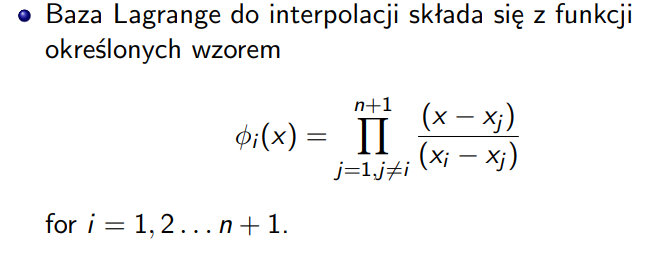

In [2]:
def lagrange_interpolate(point_x,point_y,x):
  value_interpolated = 0
  n = len(point_x)
  for i in range(n):
    fi = 1
    for j in range(n):
      if i != j:
        fi *= (x - point_x[j]) / (point_x[i] - point_x[j]) #tu może jeszcze powinno być 1.0 * przed nawiasem
    value_interpolated += (fi * point_y[i])
  return value_interpolated

In [3]:
def lagrange(value_x, point_x, point_y): #value_distance, nodes_distance, nodes_height
    return [lagrange_interpolate(point_x, point_y, x) for x in value_x]

In [4]:
def spline_interpolate_point(nodes_x, factors, x):
    for i, node_x in enumerate(nodes_x[:-1]):
        next_node_x = nodes_x[i + 1]
        if node_x <= x <= next_node_x:
            h = x - node_x
            interpolated_value = sum(factors[4 * i + j] * h ** j for j in range(4))
            return interpolated_value
    return 0

In [5]:
def spline(input_x, nodes_x, nodes_y):
    
    n = len(nodes_x)# ilość węzłów
    
    matrix_size = 4 * (n-1)

    A, b = np.zeros((matrix_size, matrix_size)), np.zeros(matrix_size)
    #pdb.set_trace()

    for i in range(0, n-1):
      h = nodes_x[i + 1] - nodes_x[i]
      A[4*i:4*i + 2, 4*i:4*i + 4] = [[1, 0, 0, 0], [1, h, h * h, h * h * h]]
      b[4*i:4*i + 2] = [nodes_y[i], nodes_y[i + 1]]

      if i > 0:
        h = nodes_x[i] - nodes_x[i - 1]
        A[4*i + 2:4*i + 4, 4*(i-1) + 1:4*(i-1) + 4] = [[1, 2 * h, 3 * h * h], [0, 2, 6 * h]]
        A[4*i + 2:4*i + 4, 4*i + 1:4*i + 3] = [[-1, 0], [0, -2]]


    A[2, 2] = 2
    A[3, 4 * (n - 2) + 2:4 * (n - 2) + 4] = [2, 6 * (nodes_x[n - 1] - nodes_x[n - 2])]

    #pdb.set_trace()
    lu, piv = lu_factor(A)
    factors = lu_solve((lu, piv), b)
    interpolated_values = []
    interpolated_x = []
    #pdb.set_trace()
    interpolated_values = [spline_interpolate_point(nodes_x, factors, xp) for xp in input_x if nodes_x[0] <= xp <= nodes_x[-1]]
    interpolated_x = [xp for xp in input_x if nodes_x[0] <= xp <= nodes_x[-1]]
   
    return interpolated_x, interpolated_values

Creating plot for spline method

In [6]:
def spline_plot(value_x, value_y, point_x, point_y, interpolated_x, interpolated_y):
    plt.yscale('log')
    plt.plot(value_x, value_y, '-', color = 'blue', label='Próbki')
    plt.plot(interpolated_x, interpolated_y,color = 'green', label='F(x) interpoled')
    plt.plot(point_x, point_y, 'o',color = 'orange' ,label='nodes')

    plt.title(f"Spline_Interpolation for: {str(len(point_x))} nodes")
    plt.xlabel('distance [m]')
    plt.ylabel('height [m.n.p.m]')
    plt.legend()

    save_name = f"Spline_Interpolation for {len(point_x)} nodes.png"
    plt.savefig(save_name)
    plt.show()

Creating plot fot lagrange method

In [7]:
def plot_lagrange(value_x, value_y, point_x, point_y, interpolated_x, interpolated_y):
  plt.yscale('log')
  plt.plot(value_x, value_y, '-',color ='blue', label = 'samples')#
  plt.plot(interpolated_x,interpolated_y, color ='green',label = "F(x) interpoled")#funkcja interpolujaca
  plt.plot(point_x, point_y,'o',color ='orange',label = 'nodes')#wezly

  plt.title(f"Lagrange_Interpolation for: {str(len(point_x))} nodes")
  plt.xlabel('distance [m]')
  plt.ylabel('height [m.n.p.m]')
  plt.legend()

  save_name = f"Lagrange_Interpolation for {len(point_x)} nodes.png"
  plt.savefig(save_name)
  plt.show()

Przygotowanie danych

In [8]:
#df = pd.read_csv('WielkiKanionKolorado.csv')
df = pd.read_csv('MountEverest.csv')
#df = pd.read_csv('SpacerniakGdansk.csv')
#df = pd.read_csv('GlebiaChallengera.csv')

size = df.shape[0]# len(df.index), sample_size

Przygotowanie danych

In [9]:
n = 20

intervals = n - 1#to jest ilość odcinków pomiędzy węzłami

x = (size + intervals - 1) // intervals - 1#odstep miedzy wezłami interpolacji

first_node = next(i for i in range(size - 1) if (i + 1) >= (size - 1 - (i + intervals * x)))#pierwszy wezel

x_index = [first_node + i * x for i in range(n)]#tablica indeksow wezlow interpolacji

value_distance, value_height = df.iloc[:, 0].tolist(), df.iloc[:, 1].tolist()#odleglosci i wysokosci

nodes_distance = [value_distance[i] for i in x_index]#wartosc odleglosci wezłów interpolacji
nodes_height = [value_height[i] for i in x_index]#wartosc wysokosci wezłów interpolacji

Wywołanie wcześniej zdefiniowanej funkcji dla Lagrange i wyswietlenie plotu

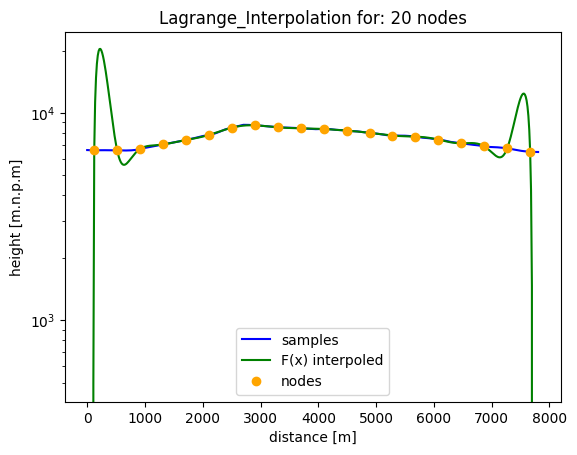

In [10]:
interpolated_lagrange = lagrange(value_distance, nodes_distance, nodes_height)
plot_lagrange(value_distance,value_height,nodes_distance, nodes_height,value_distance,interpolated_lagrange)

Wywołanie wcześniej zdefiniowanej funkcji dla Splejnu i wyswietlenie plotu

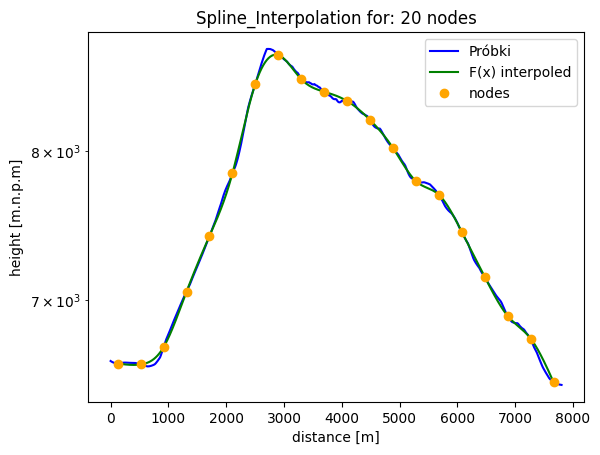

In [11]:
x_for_interpolation, interpolated_values_spline = spline(value_distance, nodes_distance, nodes_height)
spline_plot(value_distance, value_height, nodes_distance, nodes_height, x_for_interpolation, interpolated_values_spline)